<a href="https://colab.research.google.com/github/JamesChoi722/JamesChoi722/blob/main/Capstone_1_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

color = sns.color_palette()
sns.set_style("ticks")
plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart disease.csv to heart disease.csv


In [ ]:
data=pd.read_csv("heart disease.csv")

In [ ]:
print(data.shape)
print('Length of the data {}'.format(len(data)))
print(data.info())

(303, 14)
Length of the data 303
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [ ]:
data = data.drop([48 ,281,  92, 158, 163, 164, 251],axis=0).reset_index(drop=True)

In [ ]:
# Missing Values
data.isnull().sum().sum()

0

There is no missing value.

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,296.000000,296.000000,296.000000,296.00000,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,0.679054,0.959459,131.60473,247.155405,0.14527,0.523649,149.560811,0.327703,1.059122,1.395270,0.679054,2.327703,0.540541
std,9.059471,0.467631,1.034184,17.72662,51.977011,0.35297,0.526692,22.970792,0.470171,1.166474,0.618235,0.939726,0.585743,0.499198
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.00000,211.000000,0.00000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,242.500000,0.00000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,275.250000,0.00000,1.000000,166.000000,1.000000,1.650000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


Exploratory Data Analysis (EDA)

Distribution of each  ccontineous variable

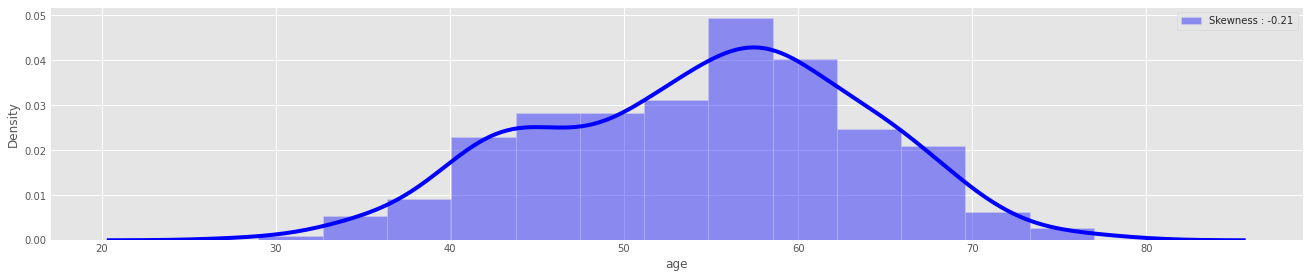

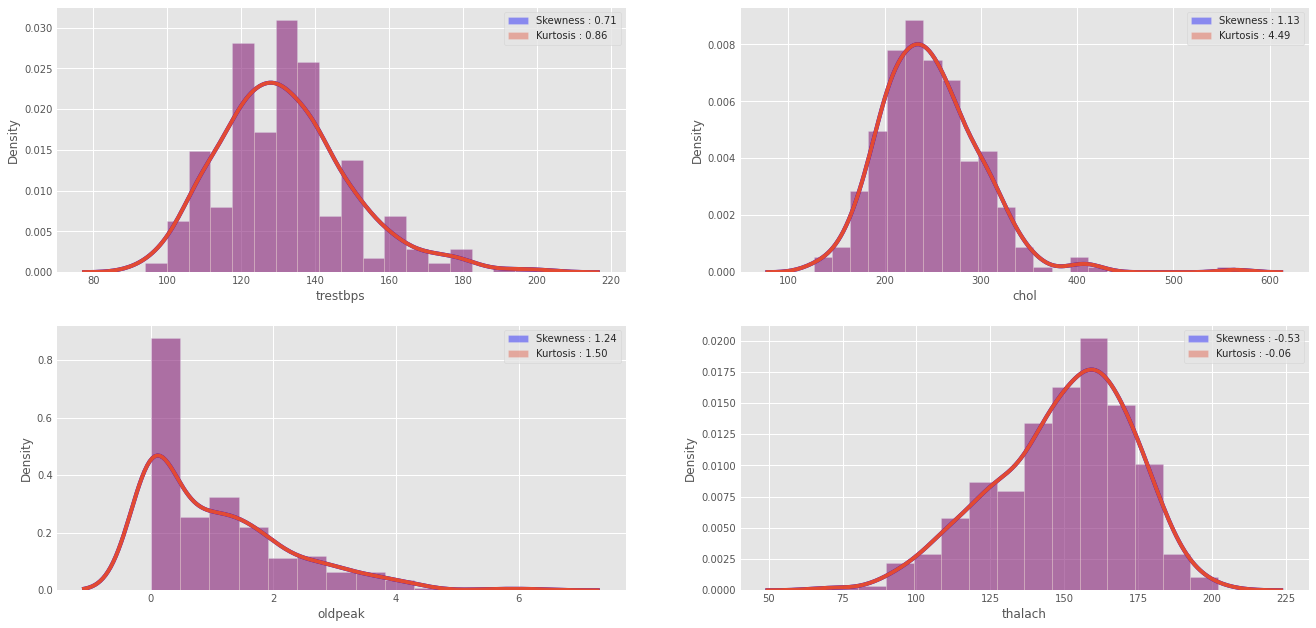

In [ ]:
# Chcek the skewness and Kurtosis
plt.figure(figsize=(20,4))
sns.distplot(data['age'],color='blue',label='Skewness : %.2f'%data['age'].skew())
plt.legend()

features = ['trestbps','chol','oldpeak','thalach']
plt.figure(figsize=(20,10))

for i in range(1, 5):
    ax=plt.subplot(2, 2, i)
    ax=sns.distplot(data[features[i-1]],label='Skewness : %.2f'%data[features[i-1]].skew(),color='blue')
    ax=sns.distplot(data[features[i-1]],label='Kurtosis : %.2f'%data[features[i-1]].kurtosis())

    plt.legend(loc='best')

From the above plots it seems that all features is normally distributed except oldpeak and chol later we well perform normality test for checking whether all our continuous features is normally distributed or not.

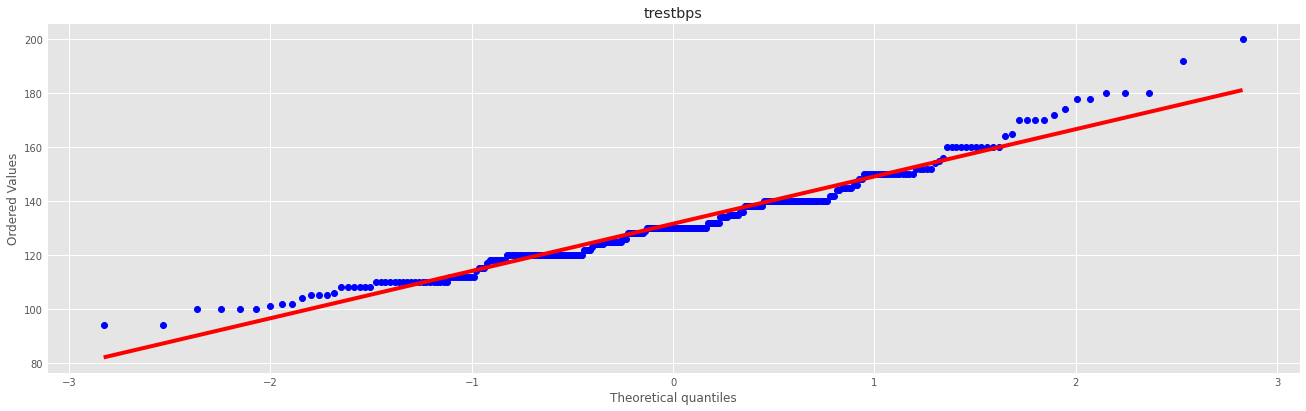

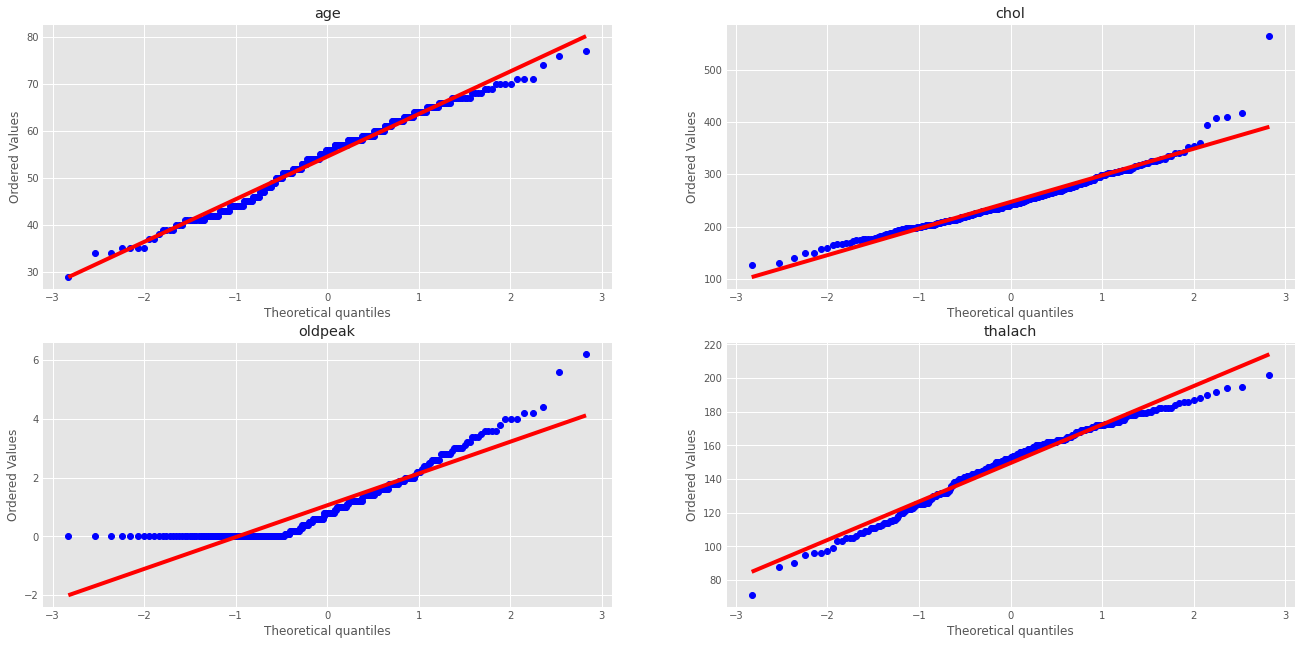

In [ ]:
# Normality Test
plt.figure(figsize=(20,6))
stats.probplot(data['trestbps'],dist="norm",plot=plt)
plt.title('trestbps')

features = ['age','chol','oldpeak','thalach']
plt.figure(figsize=(20,10))

for i in range(1, 5):
    ax=plt.subplot(2, 2, i)
    ax=stats.probplot(data[features[i-1]],dist="norm",plot=plt)
    plt.title(features[i-1])

Normality test

I use stats.normaltest to verify the data is normally distributed or not.

Test whether a sample differs from a normal distribution. This function tests the null hyppothesis that a sample comes from a normal distribution

Null Hypothesis (H0): Sample comes from a normal distribution. (Normally distributed)

Alernative Hypothesis (H1): Sample doesn't come from a normal distribution. (Not Normally Distributed)

If the data is normally distributed, the points will placed over the line, it seems like age, chol, and thalach is normally distributed.

In [ ]:
columns = ['age','trestbps','chol','oldpeak','thalach']
for i in columns:
    alpha= 0.001 #singificance-level
    k2,p = stats.normaltest(data[i],nan_policy='omit')
    
    if p>alpha:
        print('{} ----- Normally distributed (Retain the null hypothesis)'.format(i))
    else:
        print('{} -----  Not normally distributed (Reject the null hypothesis)'.format(i))

age ----- Normally distributed (Retain the null hypothesis)
trestbps -----  Not normally distributed (Reject the null hypothesis)
chol -----  Not normally distributed (Reject the null hypothesis)
oldpeak -----  Not normally distributed (Reject the null hypothesis)
thalach ----- Normally distributed (Retain the null hypothesis)


[Text(0.5, 0, 'Age Without Heart Disease')]

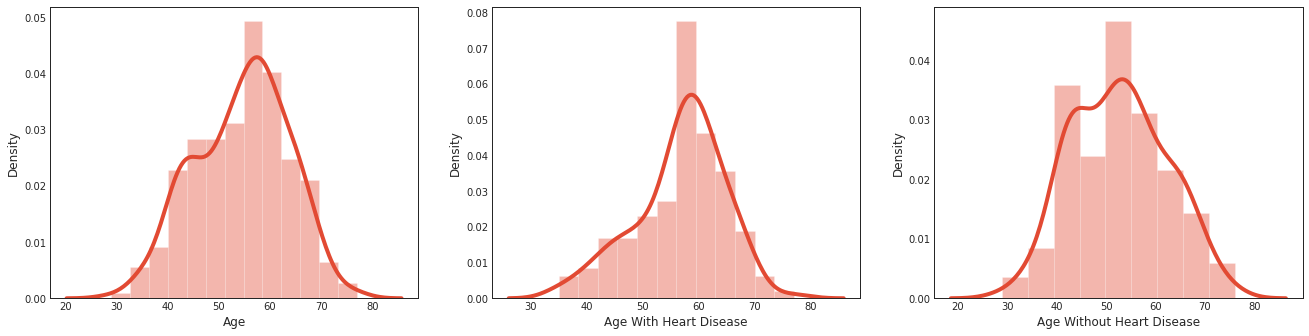

In [ ]:
# Age
sns.set_style("ticks")

age_heart_disease = data.groupby('target')['age']

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(20,5))
ax = sns.distplot(data['age'],ax=axis1)
ax.set(xlabel='Age')
ax = sns.distplot(age_heart_disease.get_group(0),ax=axis2)
ax.set(xlabel='Age With Heart Disease')
ax = sns.distplot(age_heart_disease.get_group(1),ax=axis3) 
ax.set(xlabel='Age Without Heart Disease')

In [ ]:
# Hypothesis Testing
groups_mean = data.groupby('target')['age'].mean()
groups_std = data.groupby('target')['age'].std()

groups = pd.DataFrame({'Group':[0,1],'Sample_Age_Mean':groups_mean.values,'Sample_Age_Std':groups_std.values,'Sample_Size':
                      [len(data.age[data['target'] == 0]),len(data.age[data['target'] == 1])]})
groups

,Group,Sample_Age_Mean,Sample_Age_Std,Sample_Size
0,0,56.735294,7.923930,136
1,1,52.643750,9.551151,160


Two sample t-Test with unequal variance

I am interested in finding the difference between the populatin parameter (mean of age) of the person having heart disease and not having heart disease or in simple terms it means that I am interested in finding the average age of the person based on whether or not he/hse had heart disease.

Two groups are Group A(0) consist of the people who have heart disease and Group B(1) consist of people who don't have heart disease. The sample mean and the standard deviation is known. At alpha = 0.05 (95% Confidence) test whether the average age of the person having a heart disease is more than the person who doesn't have heart disease.

Null Hypothesis (H0): uA - uB <= 0
Alternative hypothesis (HA): uA - uB > 0

u1 and u2 are the population means of age of person have heart disease and does not have heart disease.

XB_bar - 52.643750

XA_bar - 56.735294

stdB_bar - 9.551151

stdA_bar - 7.923930

nA - 136 nB - 160


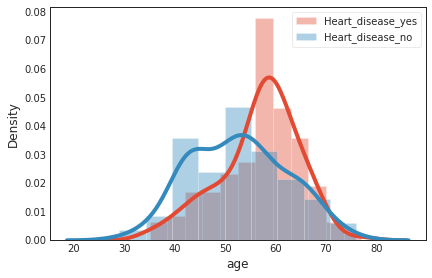

In [ ]:
# Population Density Function of Age
sns.distplot(age_heart_disease.get_group(0),label='Heart_disease_yes')
sns.distplot(age_heart_disease.get_group(1),label='Heart_disease_no')
plt.legend()

Above figure, I can observe that the distribution of the age of people who doen't have heart disease shifted downward and to the left of those who have heart disease.


In [ ]:
# Formula for t-Test
def t_test(mean1,mean2,u1_u2,n1,n2,std1,std2):
    t_stat = ((mean1 - mean2) - (u1_u2)) / np.sqrt((std1**2/n1)+(std2**2/n2))
    #print(t_stat)
    return t_stat

In [ ]:
# Formula of calculating degrees of freedom for t-Test
def degree_freedom(std1,std2,n1,n2):
    su = ((std1**2/n1)+(std2**2/n2))**2
    de = ((std1**2)/n1)**2/(n1-1) + ((std2**2)/n2)**2/(n2-1)
    df = np.round(su/de)
    return df

In [ ]:
# T-statistic
print('The corrosponding t-statistic {}'.format(t_test(56.735294,52.643750,0,136,160,7.923930,9.551151)))
print('The corrosponding degrees of freedom {}'.format(degree_freedom(7.923930,9.551151,136,160)))
pvalues = 2*(1-stats.t.cdf(4.027932863828695,294))
print('P-values -> {} '.format(pvalues))

The corrosponding t-statistic 4.027932863828695
The corrosponding degrees of freedom 294.0
P-values -> 7.169120455596811e-05 


In [ ]:
# U can also use this inbuilt library function for t-test
# from scipy import stats
stats.ttest_ind(data.age[data['target'] == 0],data.age[data['target'] == 1],equal_var=False)

Ttest_indResult(statistic=4.027932873262741, pvalue=7.17005192662898e-05)

I got the p-value less than 0.05. I can reject the null hypothesis and use alternative hypothesis is true that is average age of the person having a heart disease is more than the person who doesn't have heart disease. 

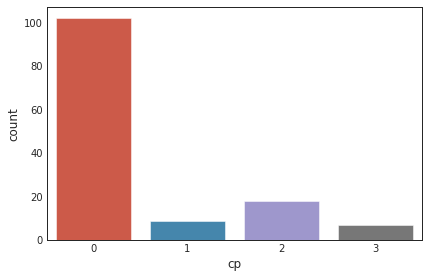

In [ ]:
# Chest pain type
# Distribution of chest pain
sns.countplot(data.cp[data['target']==0])

Chest pain type
*   Value 0: Asymptomatic
*   Value 1: Atypical angina
*   Value 2: Non-anginal pain
*   Value 3: typical angina

It's believed by a doctor that among the patients who have heart disease 30% of them have asymptomatic chest pain, 25% have an atypical angina chest pain, 40% have a non-anginal pain and 5% have typical angina. From the given sample of 136 patients who have heart disease test whether the belief of the doctor is true at alpha - 0.05.

Null Hypothesis (H0): Probability distribution of chest pain is P(asymptomatic) = 0.30, P(atypical angina) = 0.25, P(non-anginal pain) = 0.40, P(typical angina ) = 0.05.

Alternative Hypothesis (HA): Probabilty distribution of chest pain is not defined in null hypothesis.





In [ ]:
obs = pd.crosstab(data['cp'],data.target[data['target']==0])
obs = [102,9,18,7]
exp = [136*0.30,136*0.25,136*0.40,136*0.05]
values = pd.DataFrame({'Observed_Freq':obs,'Expected_Freq':exp})
values

,Observed_Freq,Expected_Freq
0,102,40.8
1,9,34.0
2,18,54.4
3,7,6.8


In [ ]:
# Apply chi square test
stats.chisquare(values.Observed_Freq,values.Expected_Freq)

Power_divergenceResult(statistic=134.54411764705887, pvalue=5.671280693724878e-29)

I can observe p-value is less than 0.05. I can reject the null hypothesis, and it means that the doctor's belief is false.

[Text(0.5, 0, 'max heart rate Without Heart Disease')]

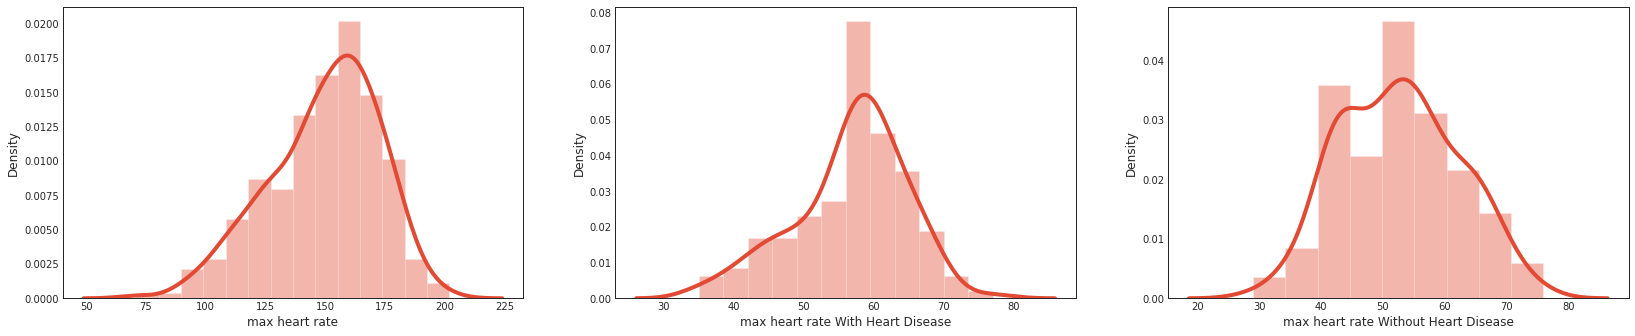

In [ ]:
# Maximum heart rate (thealach)
thal_heart_disease = data.groupby('target')['thalach']

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(25,5))
ax = sns.distplot(data['thalach'],ax=axis1)
ax.set(xlabel='max heart rate')
ax = sns.distplot(age_heart_disease.get_group(0),ax=axis2)
ax.set(xlabel='max heart rate With Heart Disease')
ax = sns.distplot(age_heart_disease.get_group(1),ax=axis3) 
ax.set(xlabel='max heart rate Without Heart Disease')

In [ ]:
# Two sample t-Test with unequal variance
groups_mean = data.groupby('target')['thalach'].mean()
groups_std = data.groupby('target')['thalach'].std()

groups = pd.DataFrame({'Group':[0,1],'Sample_thalach_Mean':groups_mean.values,'Sample_thalach_Std':groups_std.values,
                       'Sample_Size':[len(data.thalach[data['target'] == 0]),len(data.thalach[data['target'] == 1])]})
groups

,Group,Sample_thalach_Mean,Sample_thalach_Std,Sample_Size
0,0,138.948529,22.716064,136
1,1,158.581250,19.043304,160


Suppose a man claimed that the patients who have heart disease have more thalah (maximum heart rate) than patients who don't have heart disease. At alpha = 0.05 test whether the maximum heart rate for the person who has heart disease is different from those who don't have heart disease.

Null hypothesis (H0): uA = uB

Alternative hypothesis (HA): uA! = uB

uA and uB are the population means of heart rate of person have heart disease and doesn't have heart disease.

XA_bar - 138.948529

XB_bar - 158.581250

stdA_bar - 22.716064

stdB_bar - 19.043304

nA - 136 nB - 160


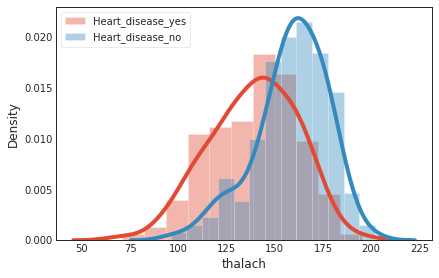

In [ ]:
sns.distplot(thal_heart_disease.get_group(0),label='Heart_disease_yes')
sns.distplot(thal_heart_disease.get_group(1),label='Heart_disease_no')
plt.legend()

In [ ]:
stats.ttest_ind(data.thalach[data['target'] == 0],data.thalach[data['target'] == 1],equal_var=False)

Ttest_indResult(statistic=-7.974715975613374, pvalue=4.627878027562763e-14)

The probability of the samples belonging to the same distribution is almost near to zero and it is less than 0.05. This means that the heart rate for the person who have heart disease is significantly different from those who don't have heart disease.